In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import subplot,imshow,title,gray,NullLocator
import scipy.misc as mi
import scipy.special as sp
from PIL import Image
from itertools import chain
from sklearn.metrics import confusion_matrix, accuracy_score


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.models import model_from_json

from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

In [68]:
# visualizza dati
def displayData(X, t, rows=10, cols=10, img_ind=None, size =16, class_value = False):
    if len(X)>rows*cols:
        img_ind = np.random.permutation(len(X))[0:rows * cols]
    else:
        img_ind = range(rows*cols)
    fig = plt.figure(figsize = (size,size))
    fig.patch.set_facecolor('white')
    ax = fig.gca()
    for i in range(100):
        plt.subplot(10,10,i+1)
        plt.imshow([255-x for x in X[img_ind[i]]], cmap='gray', interpolation='gaussian')
        if class_value:
            plt.title("{}".format(t[img_ind[i]]),fontsize = 20)
        plt.gca().xaxis.set_major_locator(plt.NullLocator())
        plt.gca().yaxis.set_major_locator(plt.NullLocator())
        plt.axis('off')
    plt.subplots_adjust(top=1)
    plt.show()

In [69]:
def plotData(X, Y, c, npixel=28):
    m, n = X.shape
    image = np.array(X[c,:])
    plt.figure(figsize = (6,6))
    plt.imshow((image.reshape(npixel, npixel)), cmap='Greys', interpolation='quadric')
    plt.show()

In [70]:
def plotAccuracy(acc_history_train, acc_history_test):
    plt.figure(figsize = (12,8))
    plt.plot(acc_history_train, marker='o', markersize=5, label='Train')
    plt.plot(acc_history_test, marker='o', markersize=5, label='Test')
    plt.legend()
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.show()

In [71]:
def save_model(m,filename):
    model_json = m.to_json()
    with open(filename+".json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    m.save_weights(filename+".h5")
    print("Saved model to disk")

In [72]:
def load_model(filename):
    json_file = open(filename+'.json', 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    m = model_from_json(loaded_model_json)
    # load weights into new model
    m.load_weights(filename+".h5")
    print("Loaded model from disk")
    return m

Fissa il numero di classi. Leggi i dati.

In [73]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [74]:
X_test.shape

(10000, 28, 28)

Esempio di dati

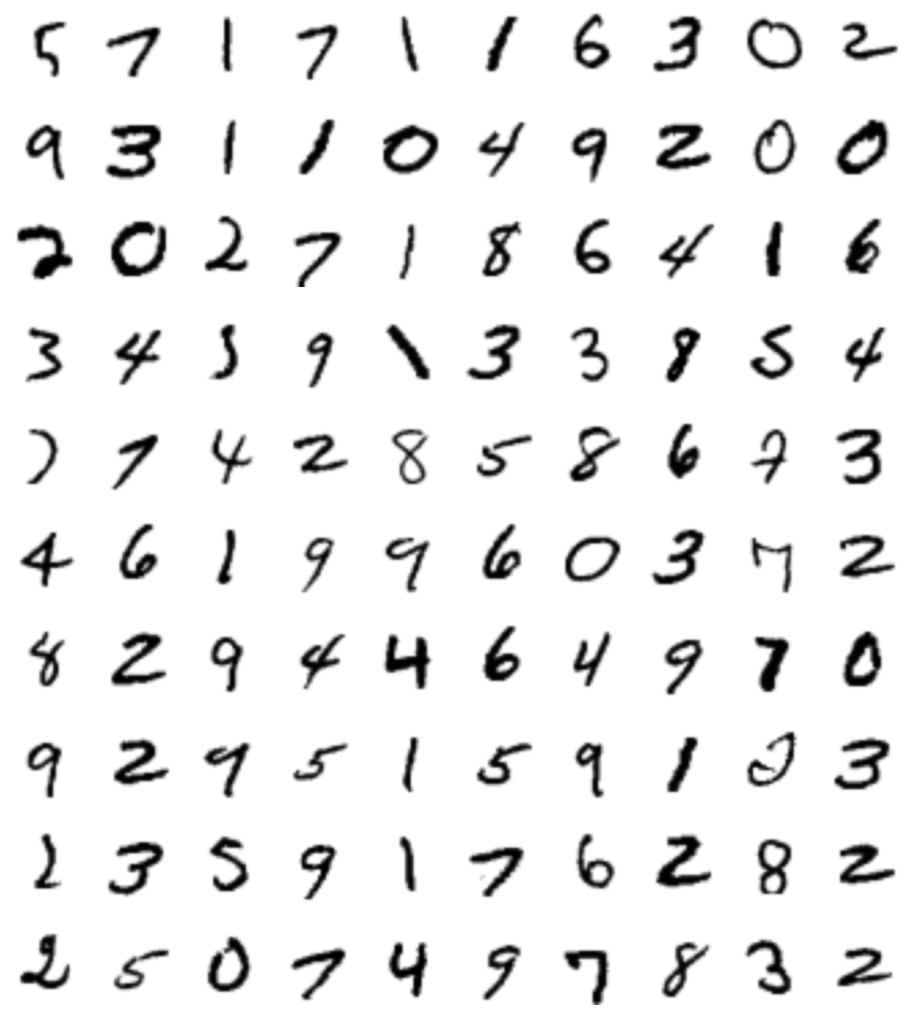

In [75]:
displayData(X_train[100:200], y_train[100:200])

Esempio di dati con relativa classe

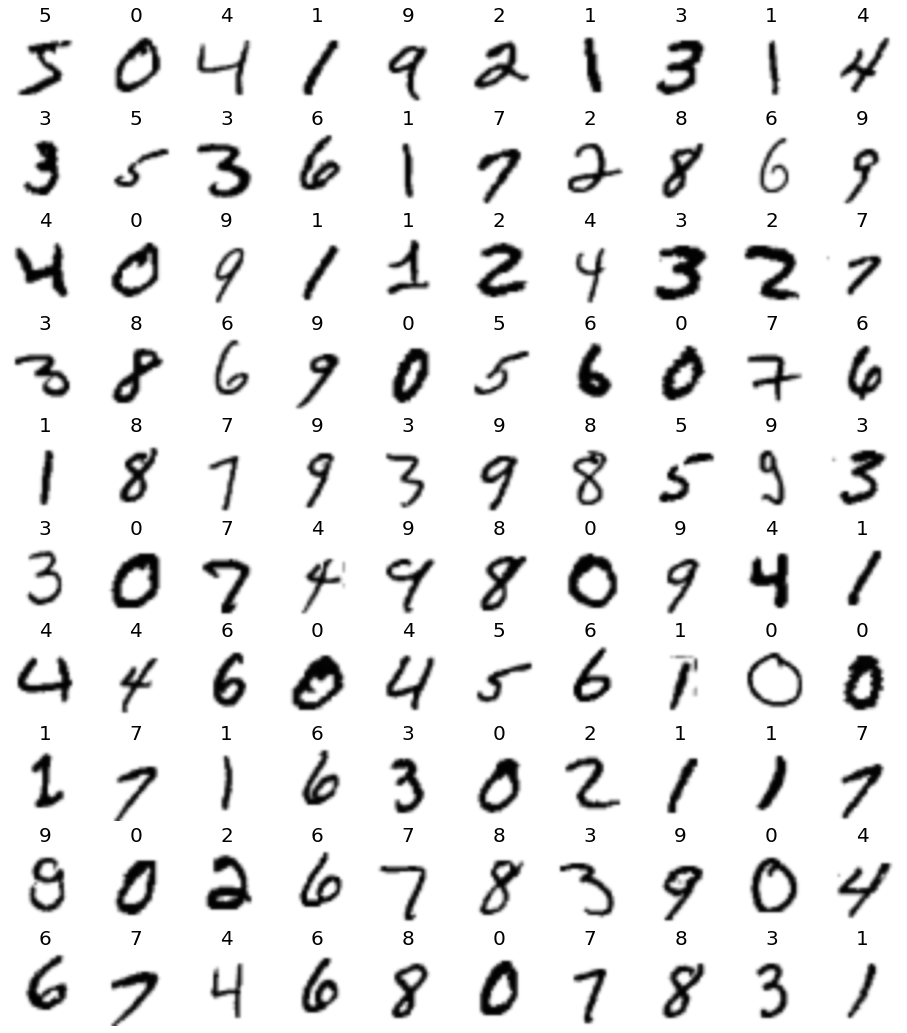

In [76]:
displayData(X_train[0:100], y_train[0:100], class_value=True)

In [77]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [78]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

Costruisci il modello (insieme delle possibili funzioni), definendo una funzione di costo da 

In [104]:
# softmax regression
model0 = Sequential()
model0.add(Dense(10, input_shape=(784,)))
model0.add(Activation('softmax'))
model0.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

Cerca la migliore funzione possibile, rispetto ai dati disponibili

In [106]:
history0 = model0.fit(X_train, Y_train, batch_size=2048, epochs=20, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.3303 - acc: 0.9111 - val_loss: 0.3188 - val_acc: 0.9150
Epoch 2/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.3263 - acc: 0.9117 - val_loss: 0.3158 - val_acc: 0.9160
Epoch 3/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.3227 - acc: 0.9127 - val_loss: 0.3125 - val_acc: 0.9163
Epoch 4/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.3190 - acc: 0.9137 - val_loss: 0.3095 - val_acc: 0.9161
Epoch 5/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.3157 - acc: 0.9146 - val_loss: 0.3068 - val_acc: 0.9175
Epoch 6/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.3126 - acc: 0.9155 - val_loss: 0.3045 - val_acc: 0.9177
Epoch 7/20
60000/60000 [==============================] - 1s 9us/step - loss: 0.3098 - acc: 0.9161 - val_loss: 0.3027 - val_acc: 0.917

Accuracy: frazione di risposte corrette

In [81]:
acc_values0 = history0.history['acc']
val_acc_values0 = history0.history['val_acc']

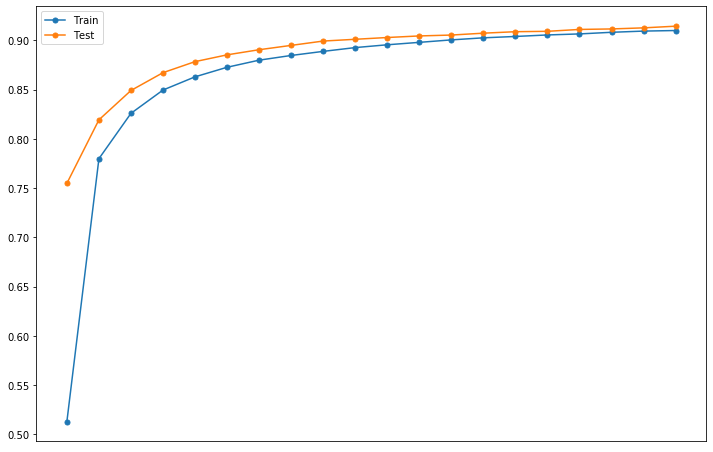

In [83]:
plotAccuracy(acc_values0, val_acc_values0)

In [84]:
predictions_train = model0.predict_classes(X_train, verbose=0)

In [85]:
confusion_matrix(y_train, predictions_train)

array([[5679,    0,   34,   23,   11,   39,   59,    5,   63,   10],
       [   0, 6543,   33,   22,    7,   44,    8,   12,   65,    8],
       [  46,   78, 5241,   98,  104,   19,   90,   92,  167,   23],
       [  23,   41,  148, 5414,    4,  205,   31,   61,  132,   72],
       [  15,   25,   36,    5, 5409,    3,   55,   18,   40,  236],
       [  73,   54,   38,  210,   67, 4581,   98,   21,  211,   68],
       [  44,   28,   47,    4,   47,   69, 5626,    6,   47,    0],
       [  28,   63,   75,   27,   64,    7,    3, 5757,   15,  226],
       [  40,  144,   69,  168,   31,  139,   51,   22, 5098,   89],
       [  36,   29,   24,   95,  186,   28,    6,  186,   45, 5314]])

In [86]:
accuracy_score(y_train, predictions_train)

0.9110333333333334

In [87]:
predictions_test = model0.predict_classes(X_test, verbose=0)

In [88]:
confusion_matrix(y_test, predictions_test)

array([[ 952,    0,    2,    4,    1,    4,   11,    1,    5,    0],
       [   0, 1107,    2,    4,    1,    1,    4,    0,   16,    0],
       [  10,   10,  904,   20,   10,    2,   14,   13,   42,    7],
       [   3,    2,   20,  914,    1,   27,    3,   12,   20,    8],
       [   1,    1,    3,    1,  921,    0,   13,    1,    8,   33],
       [   9,    5,    6,   34,   11,  759,   16,    8,   34,   10],
       [  13,    3,    5,    1,   11,   15,  906,    1,    3,    0],
       [   2,   14,   25,    6,    9,    0,    0,  929,    2,   41],
       [   8,    7,    7,   28,    9,   25,    9,   14,  856,   11],
       [  13,    6,    3,   13,   41,    7,    0,   24,    6,  896]])

In [89]:
accuracy_score(y_test, predictions_test)

0.9144

In [90]:
w = model0.layers[0].get_weights()[0]

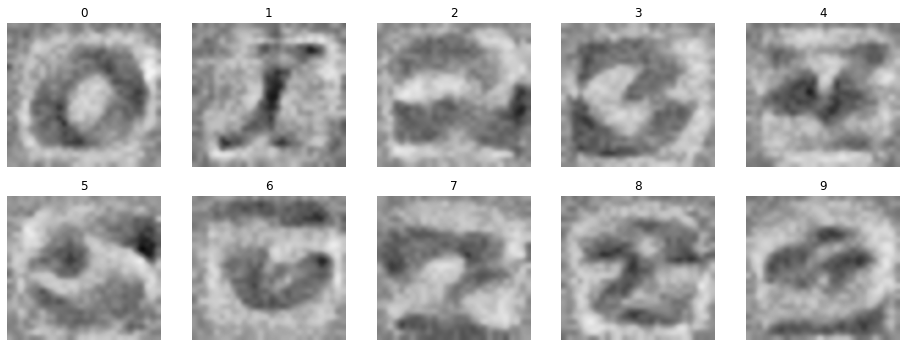

In [91]:
fig = plt.figure(figsize=(16,16))
fig.patch.set_facecolor('white')
for i in range(10):
    ax = subplot(2,5,i+1,frame_on=False, facecolor="#F8F8F8")
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    imshow(w[:,i].reshape(28,28), interpolation='quadric', 
           cmap=plt.get_cmap('Greys'), vmin=np.mean(w[:,i])-3.5*np.std(w[:,i]), 
           vmax=np.mean(w[:,i])+3.5*np.std(w[:,i]), aspect='auto')
    plt.title(i)
plt.subplots_adjust(top=0.4)
plt.show()

Elemento 3044


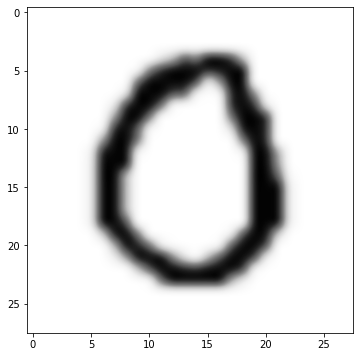

Un 0, classificato come 0


In [93]:
c = np.random.randint(0, X_test.shape[0])
p=model0.predict_classes(X_test[c:c+1,:], verbose=0)
print("Elemento "+str(c))
plotData(X_test, y_test, c)
print("Un "+str(y_test[c])+", classificato come " + str(p[0]))

In [109]:
# 3 layer NN
hidden_layer_width = 10
model1 = Sequential()
model1.add(Dense(hidden_layer_width, input_shape=(784,)))
model1.add(Activation('sigmoid'))
model1.add(Dropout(0.2))
model1.add(Dense(10))
model1.add(Activation('softmax'))
model1.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [111]:
history1 = model1.fit(X_train, Y_train, batch_size=512, epochs=50, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.5704 - acc: 0.8158 - val_loss: 0.3557 - val_acc: 0.9068
Epoch 2/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.5672 - acc: 0.8153 - val_loss: 0.3531 - val_acc: 0.9080
Epoch 3/50
60000/60000 [==============================] - 1s 11us/step - loss: 0.5643 - acc: 0.8165 - val_loss: 0.3521 - val_acc: 0.9077
Epoch 4/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.5592 - acc: 0.8200 - val_loss: 0.3459 - val_acc: 0.9105
Epoch 5/50
60000/60000 [==============================] - 1s 10us/step - loss: 0.5577 - acc: 0.8176 - val_loss: 0.3447 - val_acc: 0.9109
Epoch 6/50
60000/60000 [==============================] - 0s 7us/step - loss: 0.5529 - acc: 0.8197 - val_loss: 0.3423 - val_acc: 0.9106
Epoch 7/50
60000/60000 [==============================] - 1s 9us/step - loss: 0.5500 - acc: 0.8206 - val_loss: 0.3395 - val_acc: 0

In [96]:
acc_values1 = history1.history['acc']
val_acc_values1 = history1.history['val_acc']

epochs1 = range(1, len(acc_values1) + 1)

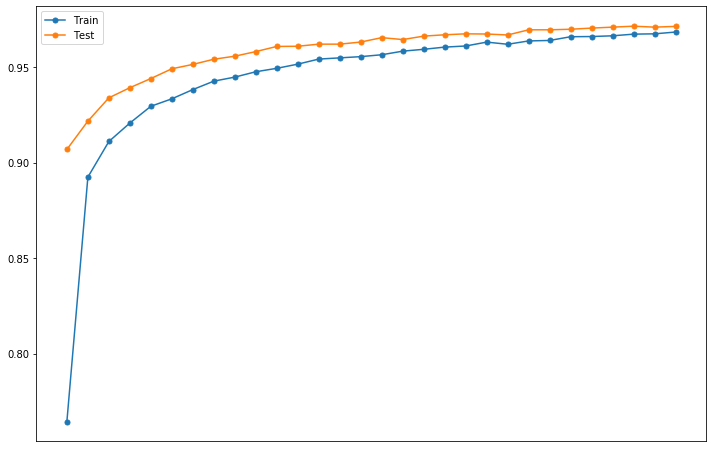

In [97]:
plotAccuracy(acc_values1, val_acc_values1)

In [98]:
predictions_train = model1.predict_classes(X_train, verbose=0)

In [99]:
confusion_matrix(y_train, predictions_train)

array([[5879,    0,    7,    2,    5,    2,    9,    1,   14,    4],
       [   1, 6675,   18,    5,    7,    2,    2,    9,   20,    3],
       [   7,    4, 5876,   16,   13,    3,    2,   18,   15,    4],
       [   4,    2,   35, 5971,    3,   42,    0,   26,   33,   15],
       [   4,    8,    7,    0, 5752,    2,   12,    5,    7,   45],
       [   9,    5,    4,   38,    7, 5309,   20,    0,   18,   11],
       [  14,    4,    1,    0,    9,    8, 5869,    0,   13,    0],
       [   2,   15,   36,    2,   24,    3,    0, 6154,    5,   24],
       [   8,   21,    8,   22,    8,   14,    5,    6, 5745,   14],
       [   9,    6,    1,   26,   63,   11,    2,   30,   22, 5779]])

In [100]:
accuracy_score(y_train, predictions_train)

0.9834833333333334

In [101]:
predictions_test = model1.predict_classes(X_test, verbose=0)

In [102]:
confusion_matrix(y_test, predictions_test)

array([[ 967,    0,    1,    0,    1,    1,    6,    2,    2,    0],
       [   0, 1121,    4,    0,    0,    1,    1,    2,    6,    0],
       [   5,    1, 1002,    4,    4,    1,    3,    5,    7,    0],
       [   0,    0,    5,  988,    0,    5,    0,    7,    5,    0],
       [   1,    0,    5,    0,  956,    0,    7,    0,    2,   11],
       [   2,    1,    0,   13,    2,  858,    8,    1,    4,    3],
       [   5,    3,    3,    1,    6,    4,  935,    0,    1,    0],
       [   2,    6,   13,    2,    3,    0,    0,  989,    3,   10],
       [   6,    2,    4,    5,    7,    4,    3,    7,  936,    0],
       [   3,    6,    0,    8,   15,    4,    3,    7,    2,  961]])

In [103]:
accuracy_score(y_test, predictions_test)

0.9713

In [37]:
w0 = model1.layers[0].get_weights()[0]
w1 = model1.layers[3].get_weights()[0]
w = np.dot(w0,w1)

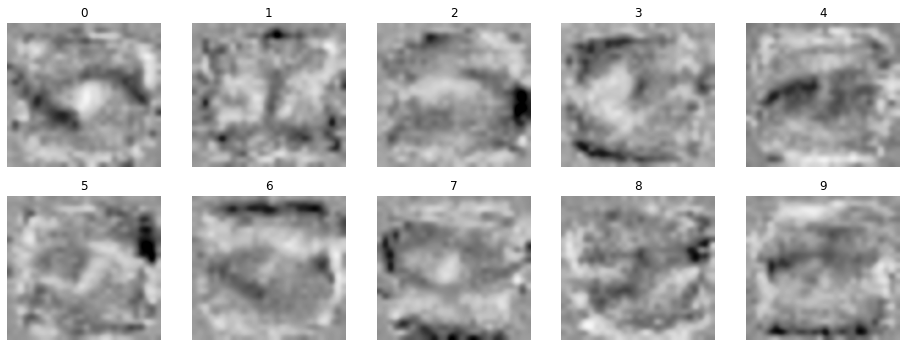

In [38]:
fig = plt.figure(figsize=(16,16))
fig.patch.set_facecolor('white')
for i in range(10):
    ax = subplot(2,5,i+1,frame_on=False, facecolor="#F8F8F8")
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    imshow(w[:,i].reshape(28,28), interpolation='quadric', 
           cmap=plt.get_cmap('Greys'), vmin=np.mean(w[:,i])-3.5*np.std(w[:,i]), 
           vmax=np.mean(w[:,i])+3.5*np.std(w[:,i]), aspect='auto')
    plt.title(i)
plt.subplots_adjust(top=0.4)
plt.show()

In [39]:
# 4 layer NN
hidden_layer1_width = 120
hidden_layer2_width = 50
model2 = Sequential()
model2.add(Dense(hidden_layer1_width, input_shape=(784,)))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(hidden_layer2_width))
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [40]:
model2.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer='adam')

In [41]:
history2 = model2.fit(X_train, Y_train, batch_size=1024, epochs=10, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/step - loss: 1.0512 - acc: 0.6737 - val_loss: 0.3509 - val_acc: 0.9042
Epoch 2/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.4115 - acc: 0.8790 - val_loss: 0.2466 - val_acc: 0.9288
Epoch 3/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.3123 - acc: 0.9081 - val_loss: 0.2009 - val_acc: 0.9409
Epoch 4/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.2637 - acc: 0.9215 - val_loss: 0.1728 - val_acc: 0.9495
Epoch 5/10
60000/60000 [==============================] - 1s 21us/step - loss: 0.2286 - acc: 0.9341 - val_loss: 0.1527 - val_acc: 0.9539
Epoch 6/10
60000/60000 [==============================] - 2s 25us/step - loss: 0.2013 - acc: 0.9411 - val_loss: 0.1346 - val_acc: 0.9600
Epoch 7/10
60000/60000 [==============================] - 1s 22us/step - loss: 0.1835 - acc: 0.9461 - val_loss: 0.1262 - val_acc

In [42]:
acc_values2 = history2.history['acc']
val_acc_values2 = history2.history['val_acc']

epochs2 = range(1, len(acc_values2) + 1)

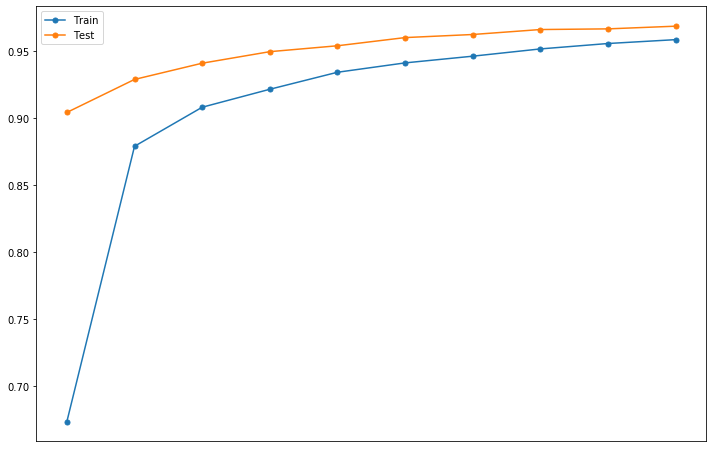

In [43]:
plotAccuracy(acc_values2, val_acc_values2)

In [44]:
predictions_train = model2.predict_classes(X_train, verbose=0)

In [45]:
confusion_matrix(y_train, predictions_train)

array([[5841,    1,    5,    6,    5,   10,   22,    4,   22,    7],
       [   1, 6652,   28,   14,   10,    2,    1,   11,   21,    2],
       [  12,    9, 5839,   20,   17,    4,    5,   31,   19,    2],
       [   5,    6,   45, 5932,    2,   44,    1,   30,   48,   18],
       [   4,   11,   17,    0, 5700,    2,   18,    8,    6,   76],
       [  19,    3,    7,   52,    6, 5260,   30,    6,   25,   13],
       [  18,    6,    6,    1,    9,   22, 5846,    0,   10,    0],
       [   8,   20,   38,    7,   18,    0,    1, 6127,    4,   42],
       [   6,   27,   12,   53,   13,   28,   15,    7, 5665,   25],
       [  16,   13,    0,   61,   59,   11,    2,   47,   28, 5712]])

In [46]:
accuracy_score(y_train, predictions_train)

0.9762333333333333

In [47]:
predictions_test = model2.predict_classes(X_test, verbose=0)

In [48]:
confusion_matrix(y_test, predictions_test)

array([[ 969,    0,    1,    2,    0,    3,    3,    1,    1,    0],
       [   0, 1122,    4,    0,    0,    0,    4,    1,    4,    0],
       [   5,    2,  999,    5,    4,    0,    2,    9,    6,    0],
       [   1,    0,    7,  981,    0,    6,    0,    9,    5,    1],
       [   1,    1,    7,    0,  956,    0,    3,    0,    2,   12],
       [   5,    1,    0,   11,    2,  854,   10,    1,    6,    2],
       [   7,    3,    1,    0,    7,    9,  926,    0,    5,    0],
       [   1,    9,   12,    4,    1,    0,    0,  994,    0,    7],
       [   4,    1,    2,   11,    6,    7,    3,    6,  931,    3],
       [   7,    6,    0,   12,   15,    3,    0,    6,    7,  953]])

In [49]:
accuracy_score(y_test, predictions_test)

0.9685

In [50]:
w0 = model2.layers[0].get_weights()[0]
w1 = model2.layers[3].get_weights()[0]
w2 = model2.layers[6].get_weights()[0]
w = np.dot(np.dot(w0,w1),w2)

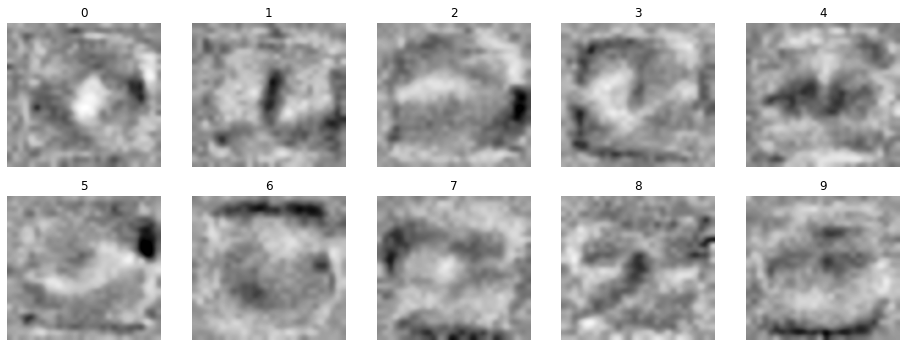

In [51]:
fig = plt.figure(figsize=(16,16))
fig.patch.set_facecolor('white')
for i in range(10):
    ax = subplot(2,5,i+1,frame_on=False, facecolor="#F8F8F8")
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())
    imshow(w[:,i].reshape(28,28), interpolation='quadric', 
           cmap=plt.get_cmap('Greys'), vmin=np.mean(w[:,i])-3.5*np.std(w[:,i]), 
           vmax=np.mean(w[:,i])+3.5*np.std(w[:,i]), aspect='auto')
    plt.title(i)
plt.subplots_adjust(top=0.4)
plt.show()

In [52]:
model3 = Sequential()
model3.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(15, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.2))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(50, activation='relu'))
model3.add(Dense(10, activation='softmax'))

In [53]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [54]:
X_train_c = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test_c = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

In [55]:
history3 = model3.fit(X_train_c, Y_train, batch_size=1024, epochs=10, verbose=1, validation_data=(X_test_c, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 44s 736us/step - loss: 1.0300 - acc: 0.6588 - val_loss: 0.2687 - val_acc: 0.9244
Epoch 2/10
60000/60000 [==============================] - 43s 715us/step - loss: 0.2365 - acc: 0.9305 - val_loss: 0.1213 - val_acc: 0.9642
Epoch 3/10
60000/60000 [==============================] - 48s 798us/step - loss: 0.1437 - acc: 0.9572 - val_loss: 0.0790 - val_acc: 0.9761
Epoch 4/10
60000/60000 [==============================] - 44s 739us/step - loss: 0.1098 - acc: 0.9670 - val_loss: 0.0671 - val_acc: 0.9780
Epoch 5/10
60000/60000 [==============================] - 43s 717us/step - loss: 0.0916 - acc: 0.9718 - val_loss: 0.0538 - val_acc: 0.9840
Epoch 6/10
60000/60000 [==============================] - 45s 755us/step - loss: 0.0789 - acc: 0.9754 - val_loss: 0.0458 - val_acc: 0.9850
Epoch 7/10
60000/60000 [==============================] - 45s 755us/step - loss: 0.0701 - acc: 0.9786 - val_loss: 0.

In [56]:
acc_values3 = history3.history['acc']
val_acc_values3 = history3.history['val_acc']

epochs3 = range(1, len(acc_values3) + 1)

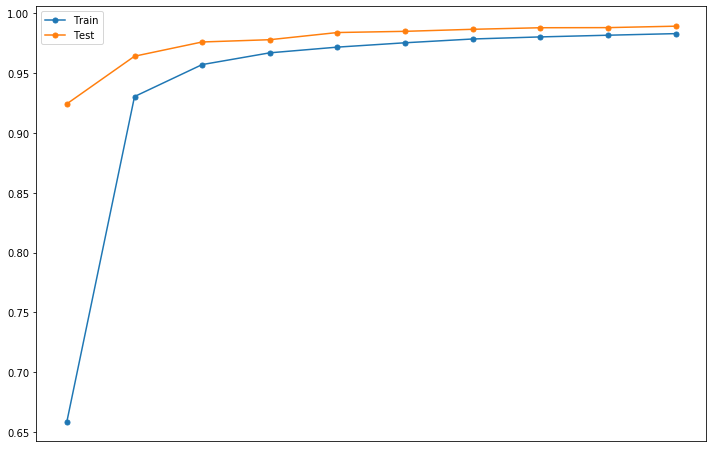

In [57]:
plotAccuracy(acc_values3, val_acc_values3)

In [58]:
predictions_train = model3.predict_classes(X_train_c, verbose=0)

In [59]:
confusion_matrix(y_train, predictions_train)

array([[5891,    1,    2,    0,    2,    5,   11,    1,    6,    4],
       [   1, 6697,    7,    1,    2,    0,    3,   17,   13,    1],
       [   4,    7, 5888,   11,    5,    0,    1,   12,   23,    7],
       [   1,    0,   15, 6030,    0,   35,    1,   19,   21,    9],
       [   2,    4,    4,    0, 5795,    1,    8,    8,    5,   15],
       [   1,    1,    1,   13,    1, 5370,   22,    1,    8,    3],
       [   5,    3,    2,    1,    5,    7, 5883,    0,   12,    0],
       [   1,    8,   11,    1,    2,    0,    0, 6233,    6,    3],
       [   6,    6,    5,    6,    4,   14,   12,    3, 5785,   10],
       [  10,    3,    0,   10,   29,   17,    1,   30,   21, 5828]])

In [60]:
accuracy_score(y_train, predictions_train)

0.99

In [66]:
predictions_test = model3.predict_classes(X_test, verbose=0)

ValueError: Error when checking input: expected conv2d_1_input to have 4 dimensions, but got array with shape (10000, 784)

In [64]:
confusion_matrix(y_test, predictions_test)

array([[ 969,    0,    1,    2,    0,    3,    3,    1,    1,    0],
       [   0, 1122,    4,    0,    0,    0,    4,    1,    4,    0],
       [   5,    2,  999,    5,    4,    0,    2,    9,    6,    0],
       [   1,    0,    7,  981,    0,    6,    0,    9,    5,    1],
       [   1,    1,    7,    0,  956,    0,    3,    0,    2,   12],
       [   5,    1,    0,   11,    2,  854,   10,    1,    6,    2],
       [   7,    3,    1,    0,    7,    9,  926,    0,    5,    0],
       [   1,    9,   12,    4,    1,    0,    0,  994,    0,    7],
       [   4,    1,    2,   11,    6,    7,    3,    6,  931,    3],
       [   7,    6,    0,   12,   15,    3,    0,    6,    7,  953]])

In [65]:
accuracy_score(y_test, predictions_test)

0.9685